In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import random

In [2]:
path = '../Data/Images'
folders = os.listdir(path)

In [3]:
data = []

In [4]:
for folder in folders:
    
    # Label as healthy or diseased
    if folder.endswith('healthy'):
        label = 1
    else:
        label = 0
    
    # Iterate through the folders
    folder_images = os.listdir(path + '/' + folder)
    folder_path = path + '/' + folder + '/'
    
    # Extract images from each folder
    for image in folder_images:
        image_path = os.path.join(folder_path, image)
        image_path = Image.open(image_path)
        
        # Convert image to pixel values
        pixel_values = np.array(image_path)
        
        # Add image and label
        data.append((pixel_values, label))

In [5]:
len(data)

10646

In [6]:
data = data[:10000]

In [7]:
# Shuffle the data
random.shuffle(data)

In [8]:
images = [pair[0] for pair in data]
labels = [pair[1] for pair in data]

In [9]:
# Define the proportions for train, validation, and test sets
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

In [10]:
# Calculate the number of samples for each set
num_samples = len(data)
num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

In [22]:
# Split the data
train_images = images[:num_train]
val_images = images[num_train:num_train + num_val]
test_images = images[num_train + num_val:]

# Split the data
train_labels = labels[:num_train]
val_labels = labels[num_train:num_train + num_val]
test_labels = labels[num_train + num_val:]

In [12]:
len(train_labels)

6000

In [17]:
def normalise_images(images):
    
    mean = np.mean(images, axis=0)
    print(mean)
    variance = np.var(images, axis=0)
    
    return mean, variance

In [18]:
mean, var = normalise_images(train_images)

[[[111.8385     107.28566667 109.17466667]
  [120.27333333 115.62066667 117.5185    ]
  [120.34033333 115.7045     117.59966667]
  ...
  [120.6795     116.1745     118.07566667]
  [120.60133333 116.05933333 118.00566667]
  [120.30366667 115.7405     117.71833333]]

 [[120.89916667 116.24       118.21366667]
  [129.14333333 124.383      126.38066667]
  [129.62416667 124.8775     126.865     ]
  ...
  [129.0365     124.41833333 126.3795    ]
  [129.28566667 124.63416667 126.639     ]
  [128.993      124.31733333 126.35583333]]

 [[121.04533333 116.38633333 118.38216667]
  [129.45083333 124.68866667 126.7155    ]
  [129.58783333 124.8375     126.8565    ]
  ...
  [129.2515     124.64566667 126.61783333]
  [129.409      124.76366667 126.788     ]
  [129.1105     124.44733333 126.491     ]]

 ...

 [[120.05266667 114.98516667 116.8075    ]
  [128.306      123.13816667 124.97566667]
  [128.14033333 123.001      124.7855    ]
  ...
  [128.14683333 122.91933333 124.91633333]
  [128.15383333 12

In [20]:
def apply_normalisation(images, mean, variance):
    
    images = (images - mean) / np.sqrt(variance)
    
    return images

In [21]:
#train_images = apply_normalisation(train_images, mean, var)

In [24]:
type(train_images)

list

In [25]:
# Normalize the training data
train_images = [image/255 for image in train_images]
val_images = [image/255 for image in val_images]
test_images = [image/255 for image in test_images]

In [ ]:
# check val and test mean and variance 

In [27]:
img = train_images[2]

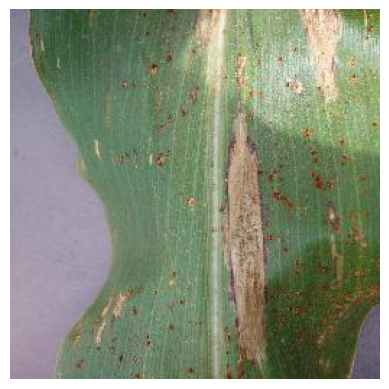

In [28]:
plt.imshow(img);
plt.axis('off');  # Hide axis
plt.show();

In [49]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

In [35]:
t = train_images[:1000]
l = train_labels[:1000]

In [36]:
train_data = [(torch.tensor(t[i]), torch.tensor(l[i])) for i in range(1000)]

In [46]:
#Define train and test loaders
train_loader = DataLoader(train_data, batch_size=16, shuffle=True, drop_last=True)

In [47]:
for batch_tensor1, batch_tensor2 in train_loader:
    # Print the size of the current batch tensors
    print("Batch tensor 1 size:", batch_tensor1.size())
    print("Batch tensor 2 size:", batch_tensor2.size())

Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: torch.Size([16, 256, 256, 3])
Batch tensor 2 size: torch.Size([16])
Batch tensor 1 size: 

In [54]:
# Define the CNN model using nn.Sequential
model = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Conv2d(32, 64, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    nn.Flatten(),
    nn.Linear(3136, 128),
    nn.ReLU(),
    nn.Linear(128, 2)
)

In [55]:
# Instantiate the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)

In [56]:
def accuracy(model, images, test_loader):

    # Evaluation
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total

    return accuracy

In [57]:
# Training lop
num_epochs = 1
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

    acc = accuracy(model, images, test_loader)

    print(f'Test Accuracy: {acc * 100:.2f}%')

RuntimeError: Input type (double) and bias type (float) should be the same